In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
import time
# from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, cohen_kappa_score, log_loss
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [2]:
df1 = pd.read_csv("Covid Dataset.csv")
df1

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [3]:
df1.replace({'Yes': 1, 'No': 0}, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

In [4]:
# Split the data into features (x) and target (y)
y = df1['COVID-19']
x = df1.drop(columns='COVID-19', axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [5]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [6]:
y_train_resampled.value_counts()

0    3495
1    3495
Name: COVID-19, dtype: int64

In [7]:
# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best ROC AUC Score','Roc-auc Score', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'Time Elapsed (s)'])

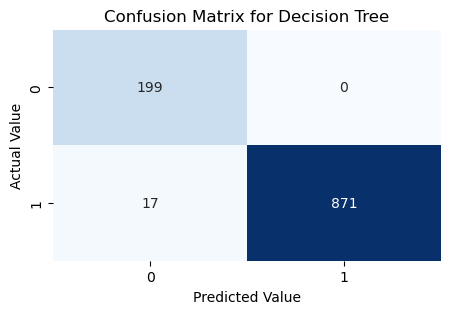

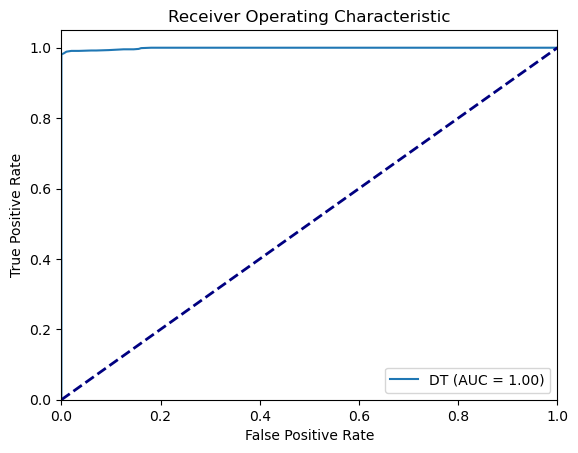

,Model,Best Parameters,Best ROC AUC Score,Roc-auc Score,Accuracy,Sensitivity,Specificity,Precision,F1 Score,Time Elapsed (s)
criterion,DT,gini,0.986804,0.998809,0.984361,0.980856,1.0,1.0,0.990335,1.538393
max_depth,DT,None,0.986804,0.998809,0.984361,0.980856,1.0,1.0,0.990335,1.538393
max_features,DT,auto,0.986804,0.998809,0.984361,0.980856,1.0,1.0,0.990335,1.538393
min_samples_leaf,DT,1,0.986804,0.998809,0.984361,0.980856,1.0,1.0,0.990335,1.538393
min_samples_split,DT,2,0.986804,0.998809,0.984361,0.980856,1.0,1.0,0.990335,1.538393


In [8]:
# Initialize a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame(columns=['Model', 'Feature', 'Importance'])

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid_dt, scoring='f1', cv=3)
    
start_time = time.time()
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_dt_model = grid_search.best_estimator_
    
# Train the best model on the full training data
best_dt_model.fit(x_train_resampled, y_train_resampled)
end_time = time.time()

# Predict the class probabilities for ROC AUC curve
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  # Use class 1 probabilities for ROC AUC

best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_
    
y_pred = grid_search.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

    
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
    
# Calculate specificity
tn = np.sum((y_test == 0) & (y_pred == 0))
n = np.sum(y_test == 0)
specificity = tn / n
    
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
time_elapsed = end_time - start_time
    
results_df = pd.DataFrame({
    'Model': "DT",
    'Best Parameters': best_params,
    'Best ROC AUC Score': best_roc_auc,
    'Roc-auc Score': roc_auc,
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'Precision': precision,
    'F1 Score': f1,
    'Time Elapsed (s)': time_elapsed
})
    
# Get feature importances if applicable
if hasattr(grid_search.best_estimator_, 'feature_importances_'):
    feature_importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.columns
    for feature, importance in zip(feature_names, feature_importances):
        feature_importance_df = feature_importance_df.append({
                'Model': "DT",
                'Feature': feature,
                'Importance': importance
            }, ignore_index=True)
            
# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'DT (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

results_df

In [9]:
results_df.to_excel("res.xlsx")

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati